# Exploratory Data Analysis

### Steps to perform

1. Inspect each data and the dataset as a whole.
2. Gain insight into dataset.
3. Understand the relationship among the variables or covariates from the generated visualisations of the data.
4. Detect abnormalities present in the data which can disrupt the insight gained.
5. Test the assumptions made through visualisations.

### Objective of this project:

* ####  To understand and gain insight on how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course) present in the dataset.


### Importing the required libraries

In [1]:
import numpy as np # linear algebra and numerical calculations
import pandas as pd # data preprocessing, CSV file I/O

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data set

In [2]:
df=pd.read_csv('StudentsPerformance (3).csv')
df.shape # It shows the number of rows and columns.

(1000, 8)

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## Descriptive Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Observations:

Here, we can see:
* All the column names
* Total number of non-null values in each column, so there are no null values present in the dataset
* Data type of the values of each column
* Numerical Variables:
    * Math score 
    * Reading score
    * Writing score
* Categorical Variables:
    * Gender
    * Race/ethnicity
    * Parental level of education
    * Lunch
    * Test preparation course

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


####Observations:
We can see the **descriptive statistics** of numerical variables: total count, mean, standard deviation, minimum and maximum values and three quantiles of the data (25%,50%,75%).

* All numeric columns have almost equal standard deviations and mean values are very similar.
* Mininmum score of all subjects is 0. It is possible to be an outlier but as long as it is not a negative number we can consider it as normal (a student it is possible to take 0 score for some reason).

In [6]:
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

In [7]:
for feature in categorical_features:
    print(feature,':')
    print(df[feature].value_counts())
    print('----------------------------')

gender :
female    518
male      482
Name: gender, dtype: int64
----------------------------
race/ethnicity :
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
----------------------------
parental level of education :
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
----------------------------
lunch :
standard        645
free/reduced    355
Name: lunch, dtype: int64
----------------------------
test preparation course :
none         642
completed    358
Name: test preparation course, dtype: int64
----------------------------


### Observations:
It shows the count of all the Categorical Variables

## Univariate Analysis

In [8]:
def get_x_labels(column):
    # helper function to get all xlabels for all axes
    col_dict = dict(df[column].value_counts())
    return col_dict.keys()

def get_y_ticks(column):
    # helper function to get all heights for all axes
    return df[column].value_counts()


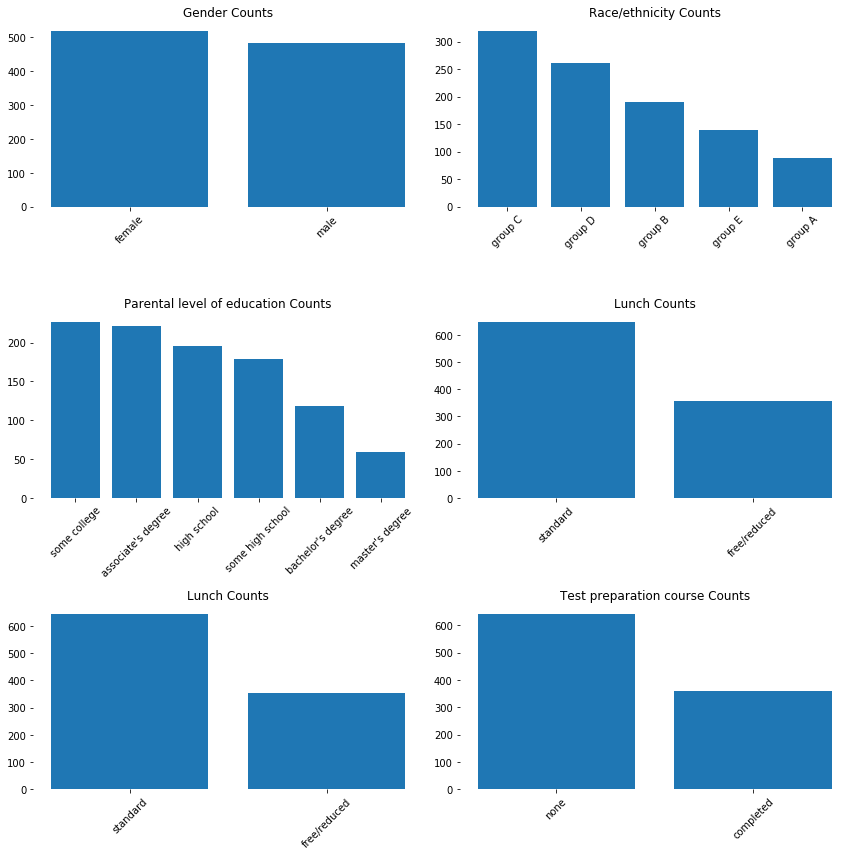

In [9]:
fig, axes = plt.subplots(3,2, figsize=(12,12), facecolor='w')

x_labels = [list(get_x_labels(feature)) for feature in categorical_features]

y_ticks = [list(get_y_ticks(feature)) for feature in categorical_features]

for i in range(3):
    for j in range(2):
        if i==1:
            axes[i,j].bar(x_labels[i+j+1], y_ticks[i+j+1])
            axes[i,j].set_frame_on(False)
            axes[i,j].set_xticklabels(x_labels[i+j+1], rotation=45)
            axes[i,j].set_title('{} Counts'.format(categorical_features[i+j+1].capitalize()))
            axes[i,j].minorticks_off()
        elif i==2:
            axes[i,j].bar(x_labels[i+j+1], y_ticks[i+j+1])
            axes[i,j].set_frame_on(False)
            axes[i,j].set_xticklabels(x_labels[i+j+1], rotation=45)
            axes[i,j].set_title('{} Counts'.format(categorical_features[i+j+1].capitalize()))
        else:
            axes[i,j].bar(x_labels[i+j], y_ticks[i+j])
            axes[i,j].set_frame_on(False)
            axes[i,j].set_xticklabels(x_labels[i+j], rotation=45)
            axes[i,j].set_title('{} Counts'.format(categorical_features[i+j].capitalize()))
plt.tight_layout()
plt.show()

### Observations:

* Two thirds of the students DIDN'T take the test preparation course
* Group A of Race/Ethinicity column has the minimum number of representatives, it is more than 3 times smaller than the Group C
* Μost counts of Parental Level of Education has the 'Some College' and the less counts has the 'Master's Degree'.

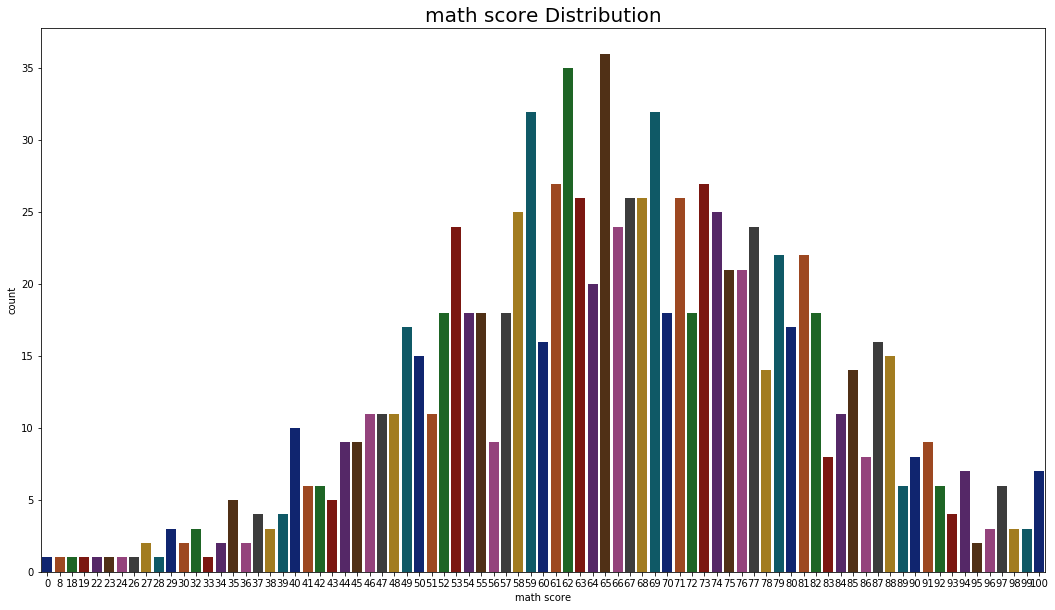

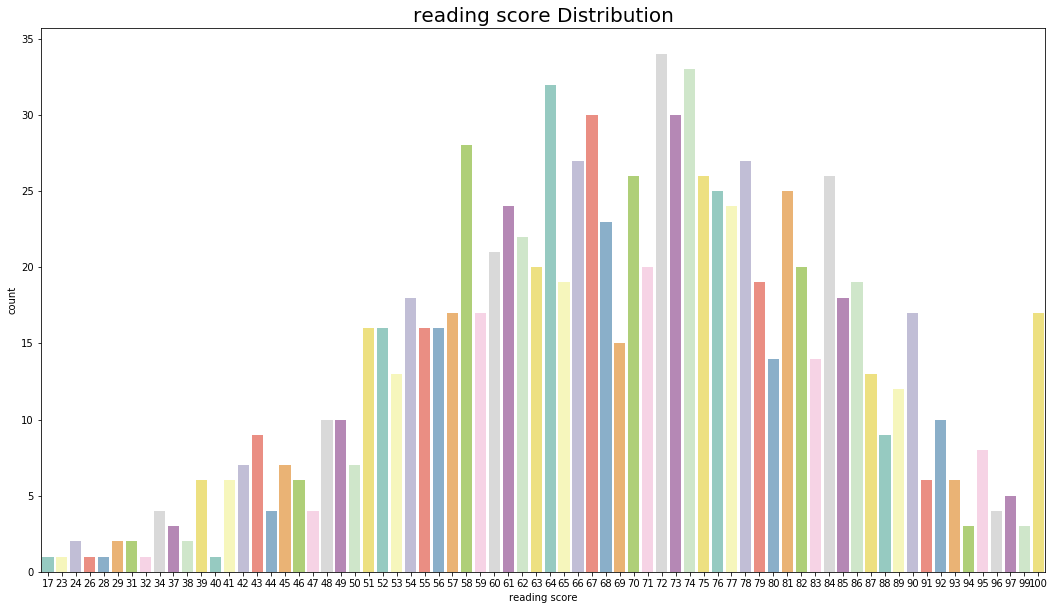

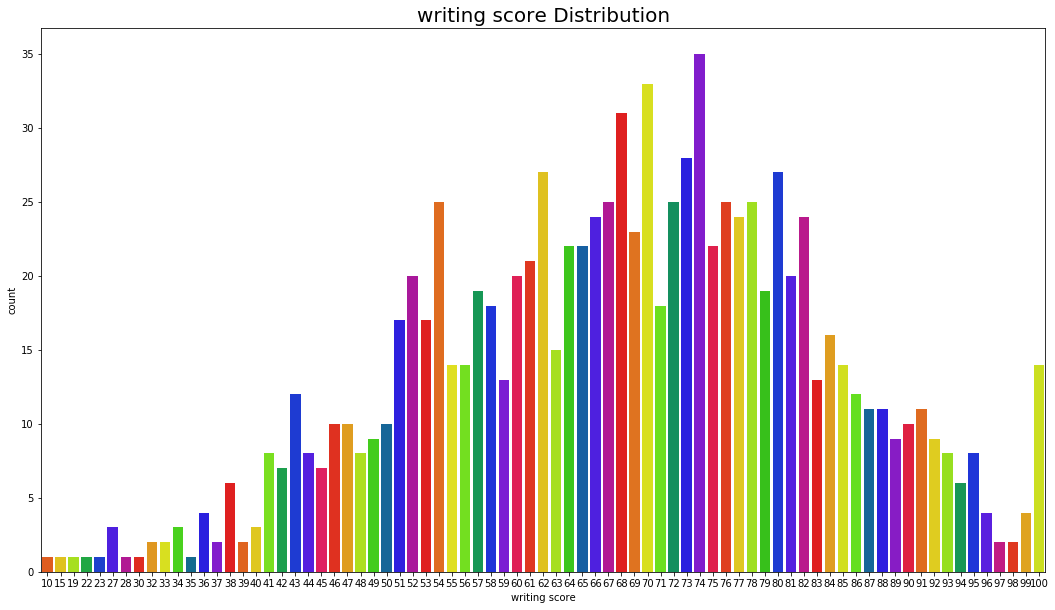

In [10]:
numeric_features = ['math score', 'reading score', 'writing score']
palette = ['dark', 'Set3', 'prism']
i=0
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.countplot(df[feature], palette = palette[i])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()
    i+=1

### Observations:
* The minimum score for Maths is: 0
* The minimum score for Reading is: 17
* The minimum score for Writing is: 10

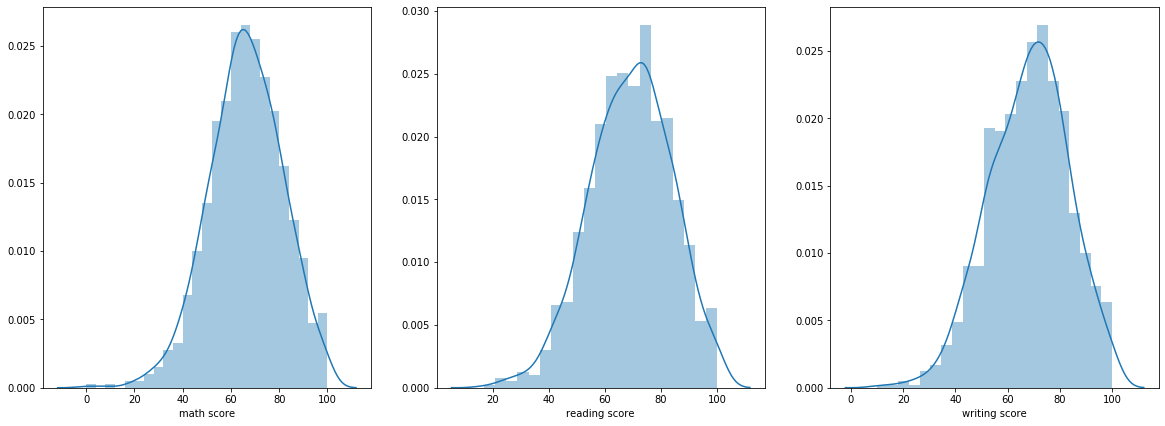

In [11]:
plt.figure(figsize = (20,7), facecolor='w')

plt.subplot(131)
sns.distplot(df['math score'])

plt.subplot(132)
sns.distplot(df['reading score'])

plt.subplot(133)
sns.distplot(df['writing score'])

plt.show()

### Observations:
It clearly shows that there is no skewness in any of the Target Columns

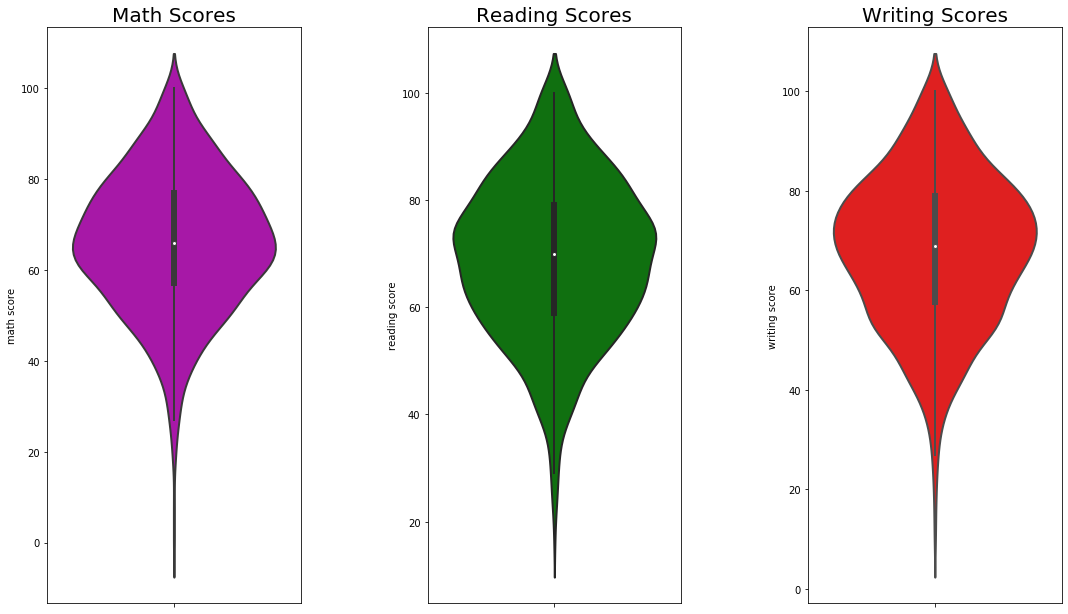

In [12]:
plt.figure(figsize=(25,10), facecolor='w')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Math Scores', fontsize=20)
sns.violinplot(y='math score',data=df,color='m',linewidth=2)
plt.subplot(142)
plt.title('Reading Scores', fontsize=20)
sns.violinplot(y='reading score',data=df,color='g',linewidth=2)
plt.subplot(143)
plt.title('Writing Scores', fontsize=20)
sns.violinplot(y='writing score',data=df,color='r',linewidth=2)
plt.show()

### Observations: 
From the above plots, we can see that the maximum number of students have scored 60-80 in all three subjects i.e., math, reading and writing.

## Bivariate and Multivariate Analysis

### Gender comparision for Each Subject

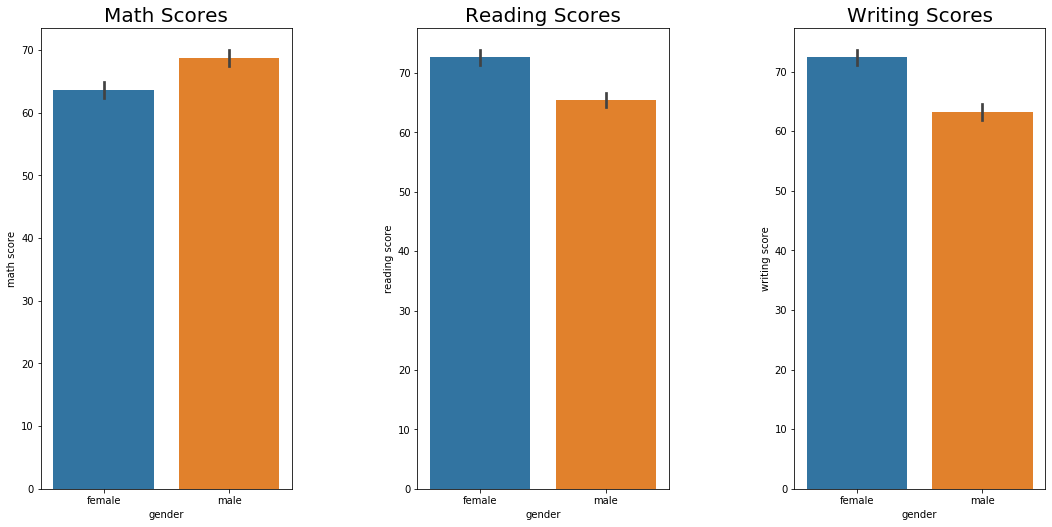

In [13]:
plt.figure(figsize=(18,8), facecolor='w')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores', fontsize=20)
sns.barplot(x="gender", y="math score", data=df)
plt.subplot(132)
plt.title('Reading Scores', fontsize=20)
sns.barplot(x="gender", y="reading score", data=df)
plt.subplot(133)
plt.title('Writing Scores', fontsize=20)
sns.barplot(x="gender", y="writing score", data=df)
plt.show()

### Observations:
We can see that male students scored higher in Maths where as female students scored higher in Reading and writing

###Test preperation course comparison for Each Subject

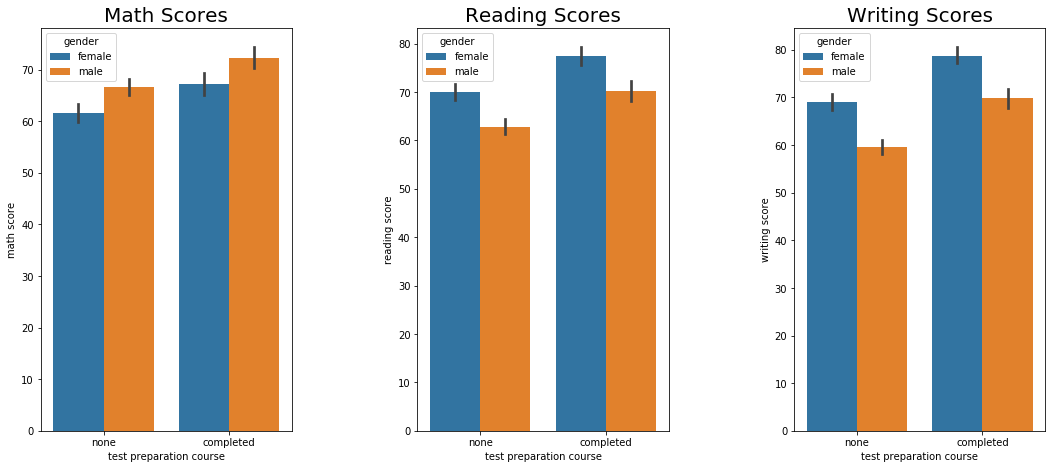

In [14]:
plt.figure(figsize=(18,7), facecolor='w')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores', fontsize=20)
sns.barplot(hue="gender", y="math score", x="test preparation course", data=df)
plt.subplot(132)
plt.title('Reading Scores', fontsize=20)
sns.barplot(hue="gender", y="reading score", x="test preparation course", data=df)
plt.subplot(133)
plt.title('Writing Scores', fontsize=20)
sns.barplot(hue="gender", y="writing score", x="test preparation course", data=df)
plt.show()

### Observations:
So the students (male and female) who completed the test preparation course scored higher in all three subjects.

###Race/Ethnicity against Test Preparation Course comparison for Each Subject

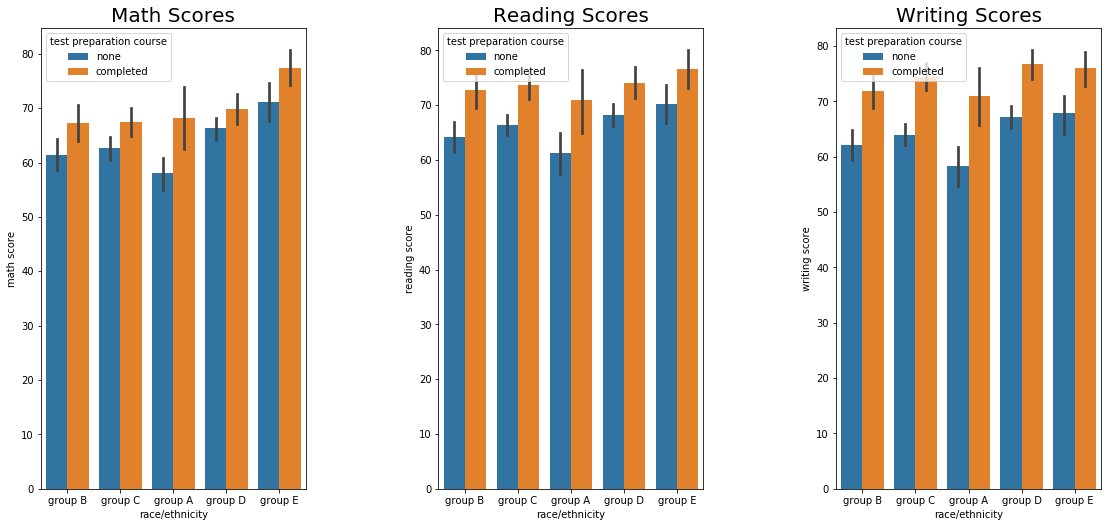

In [15]:
plt.figure(figsize=(19,8), facecolor='w')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores', fontsize=20)
sns.barplot(x="race/ethnicity", y="math score", hue="test preparation course", data=df)
plt.subplot(132)
plt.title('Reading Scores', fontsize=20)
sns.barplot(hue="test preparation course", y="reading score", x="race/ethnicity", data=df)
plt.subplot(133)
plt.title('Writing Scores', fontsize=20)
sns.barplot(hue="test preparation course", y="writing score", x= 'race/ethnicity',data=df)

plt.show()

### Observations:
* Highest number of Students who belongs to Group E has completed the test preperation course in Math and Reading and scored highest. 

* Highest number of Students who belongs to Group D and E has completed the test preperation course in Writing and scored highest. 

### Bivariate Analysis among all the scores

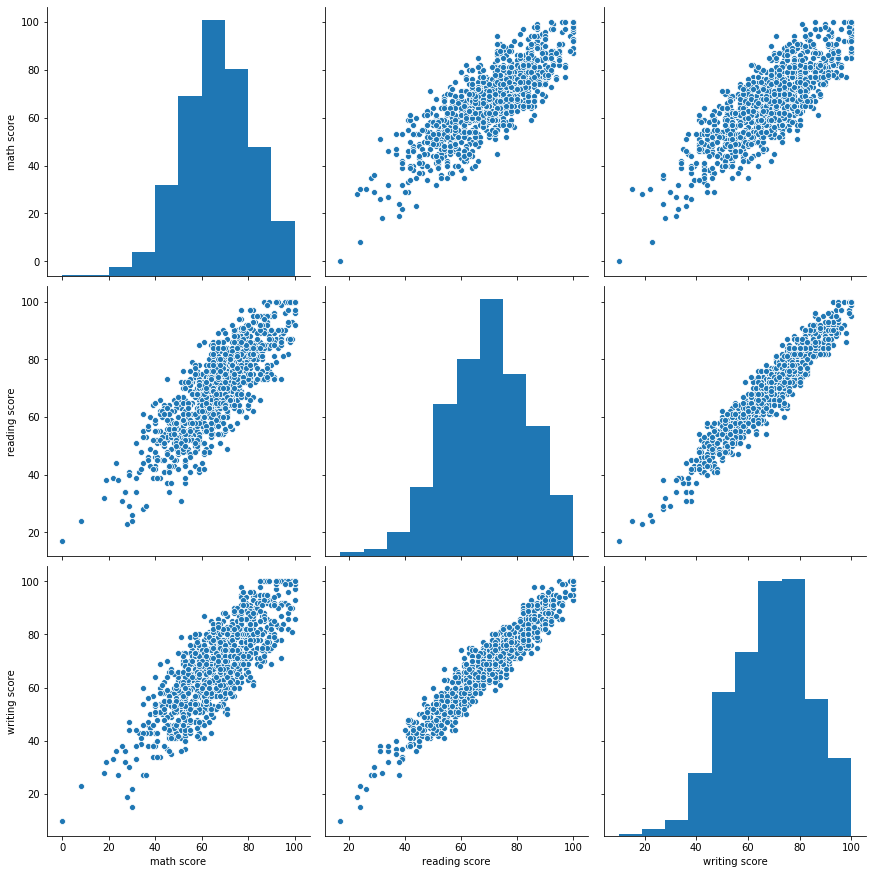

In [16]:
sns.pairplot(data=df, height=4)

### Observation:
From the above plot it is clear that all the scores increase linearly with each other

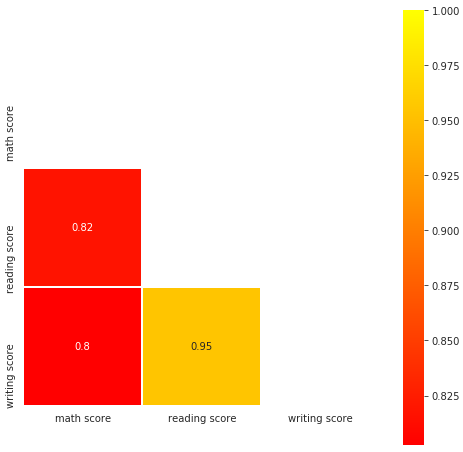

In [17]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="autumn",annot=True)

#### Observations:
* High correlations between total_scores and individual_scores
* Writing_score and reading_score are also highly correlated which tells us that if a student reads well then he/she also writes well.
* Math_score doesnt have much high correlation so it is not neccessary that if a student performs well in maths has to perform well in other aspects or vice-versa

### Analysis of the Test Preparation Course Column with other variables

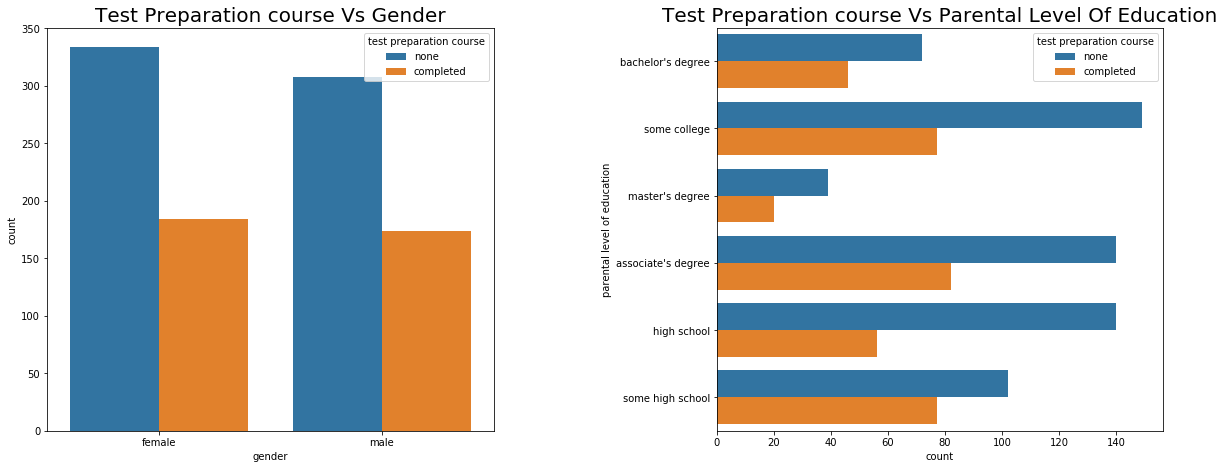

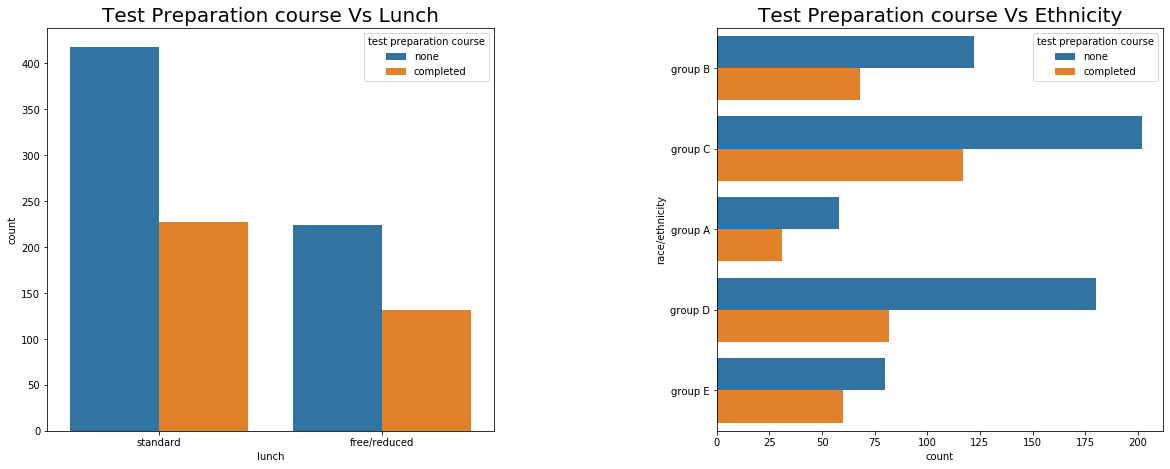

In [18]:
fig, axes = plt.subplots(2,2, figsize=(20, 7), facecolor='w')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)

plt.subplot(121)
plt.title('Test Preparation course Vs Gender',fontsize = 20)
sns.countplot(hue="test preparation course", x="gender", data=df)

plt.subplot(122)
plt.title('Test Preparation course Vs Parental Level Of Education',fontsize = 20)
sns.countplot(hue="test preparation course", y="parental level of education", data=df)

fig, axes = plt.subplots(2,2, figsize=(20, 7), facecolor='w')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)

plt.subplot(121)
plt.title('Test Preparation course Vs Lunch',fontsize = 20)
sns.countplot(hue="test preparation course", x="lunch", data=df)

plt.subplot(122)
plt.title('Test Preparation course Vs Ethnicity',fontsize = 20)
sns.countplot(hue="test preparation course", y="race/ethnicity", data=df)

plt.show()

#### Observations:
* Most of the students have not completed the test preparation course.
* Highest number Students who belong to group C ethinicity have completed the test preparation course.
* Standard lunch students have completed the test preparation course
* Students whos parental level of education is 'some college, 'associate's degree', and high school have completed the test preparation course.

We can also say that the students who belongs to Group E ethincity has scored more marks in all three subjectes even though they have not completed the test preparation course.

### Relation between all the remaining variables

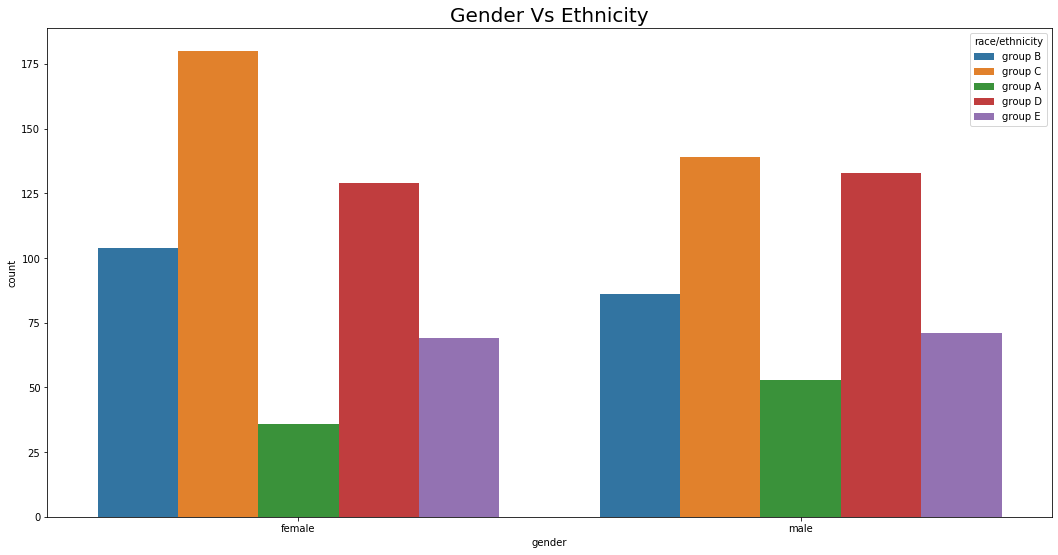

In [19]:
plt.figure(figsize=(18,9), facecolor='w')
plt.title('Gender Vs Ethnicity',fontsize = 20)
sns.countplot(x="gender", hue="race/ethnicity", data=df)
plt.show()

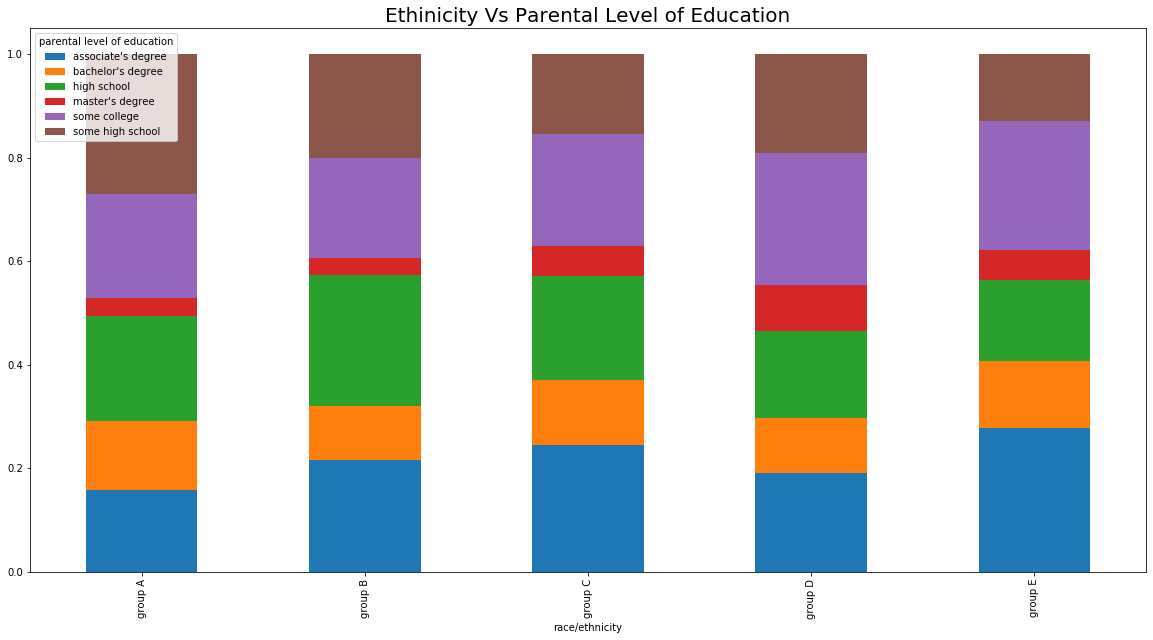

In [20]:
pr=pd.crosstab(df['race/ethnicity'],df['parental level of education'],normalize=0)

pr.plot.bar(stacked=True, figsize=(20,10))
plt.title('Ethinicity Vs Parental Level of Education',fontsize = 20)
plt.show()

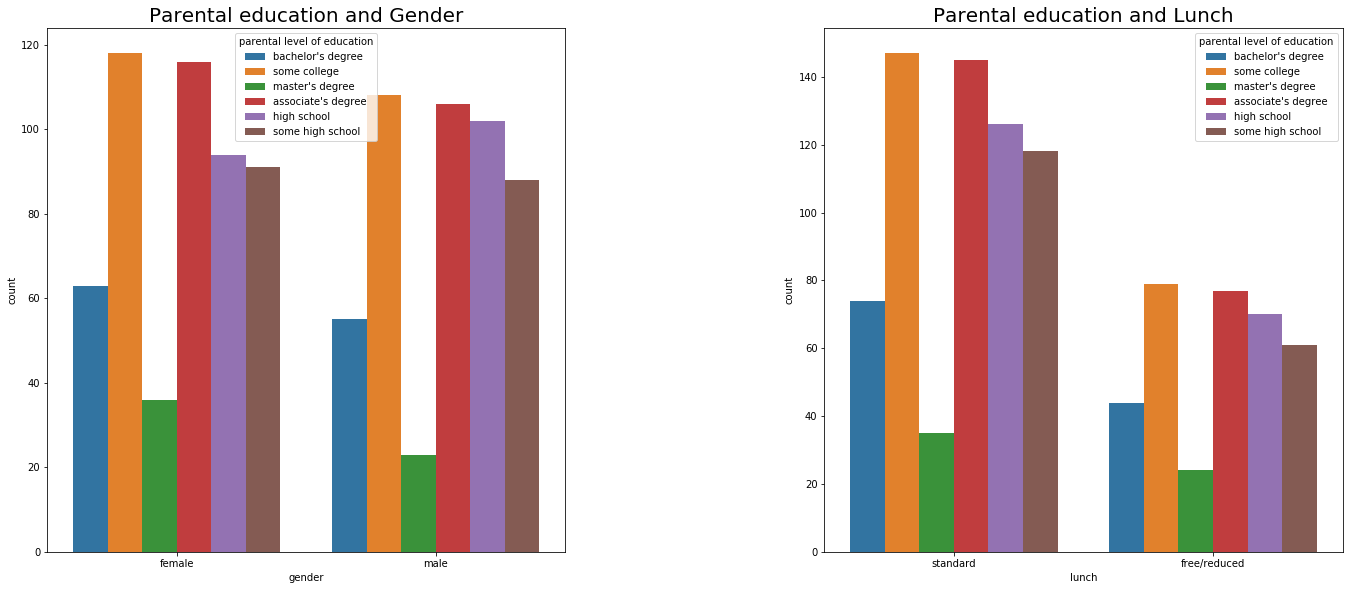

In [21]:
plt.figure(figsize=(65, 20), facecolor='w')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(251)
plt.title('Parental education and Gender',fontsize=20)
sns.countplot(hue="parental level of education", x="gender", data=df)
plt.subplot(252)
plt.title('Parental education and Lunch',fontsize=20)
sns.countplot(hue="parental level of education", x="lunch", data=df)

plt.show()

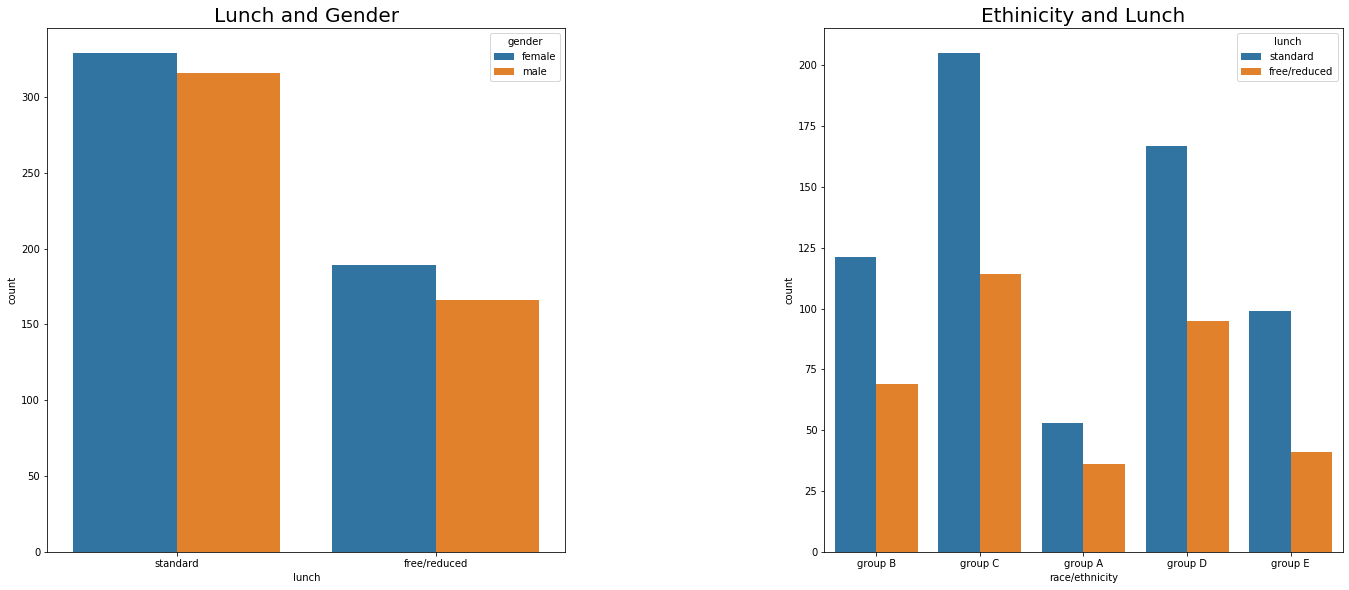

In [22]:
plt.figure(figsize=(65, 20), facecolor='w')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(251)
plt.title('Lunch and Gender',fontsize=20)
sns.countplot(x="lunch", hue="gender", data=df)
plt.subplot(252)
plt.title('Ethinicity and Lunch',fontsize=20)
sns.countplot(x="race/ethnicity", hue="lunch", data=df)
plt.show()

### Observations:
From all these plots, we observe the various relationships between the independant variables.

# Inferential Statistics

### Probability of Students Scoring More than 50 Marks in Each Subject

In [23]:
total_students = df.shape[0]
numeric_features = ['math score', 'reading score', 'writing score']
for num in numeric_features:
    students_score_more_than_50 = df[df[num] > 50].shape[0]

    probability_of_students_scoring_more_than_50_in_maths = (students_score_more_than_50/total_students)*100
    print("Probability of Students Scoring more than 50 marks in", num, ":", probability_of_students_scoring_more_than_50_in_maths)

Probability of Students Scoring more than 50 marks in math score : 85.0
Probability of Students Scoring more than 50 marks in reading score : 90.3
Probability of Students Scoring more than 50 marks in writing score : 87.6


### Probability of Students Passing in all the three Subjects

In [24]:
total_students = df.shape[0]
number_of_students_passing_in_all_subjects = df[(df['math score'] > 40) &
                                                  (df['writing score'] > 40) & 
                                                  (df['reading score'] > 40)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".format(probability_of_students_passing_in_all_the_subjects))

The Probability of Students Passing in all the Subjects is 93.90 %


### Probability of Students Scoring more than 90 in all the three Subjects

In [25]:
total_students = df.shape[0]
number_of_students_scoring_more_than_90 = df[(df['math score'] > 90) &
                                                  (df['writing score'] > 90) & 
                                                  (df['reading score'] > 90)].shape[0]

probability_of_students_scoring_more_than_90_in_all_subjects = (number_of_students_scoring_more_than_90/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".
      format(probability_of_students_scoring_more_than_90_in_all_subjects))

The Probability of Students Passing in all the Subjects is 2.30 %


### Checking the Inference

In [26]:
# taking seed so that everytime the random values come out to be constant
np.random.seed(6)

# taking 100 sample values from the dataset of 1000 values
sample_math_marks = np.random.choice(a= df['math score'], size=100)

# getting the sample mean
print ("Sample mean for Math Scores:", sample_math_marks.mean() )          

# getting the population mean
print("Population mean for Math Scores:", df['math score'].mean())

# taking 100 sample values from the dataset of 1000 values
sample_reading_marks = np.random.choice(a= df['reading score'], size=100)

# getting the sample mean
print ("\nSample mean for Reading Scores:", sample_reading_marks.mean() )          

# getting the population mean
print("Population mean for Reading Scores:", df['reading score'].mean())

# taking 100 sample values from the dataset of 1000 values
sample_writing_marks = np.random.choice(a= df['writing score'], size=100)

# getting the sample mean
print ("\nSample mean for Writing Scores:", sample_math_marks.mean() )          

# getting the population mean
print("Population mean for Writing Scores:", df['writing score'].mean())

Sample mean for Math Scores: 63.12
Population mean for Math Scores: 66.089

Sample mean for Reading Scores: 68.5
Population mean for Reading Scores: 69.169

Sample mean for Writing Scores: 63.12
Population mean for Writing Scores: 68.054


### Analysis by forming new columns: Total marks, Percentage and Grades.

In [27]:
df['total marks']=df['math score']+df['reading score']+df['writing score']

In [28]:
df['percentage']=df['total marks']/300*100

#### Assigning the following grades:

Criteria of the grades are as follows:

* 85-100 : Grade A
* 70-84 : Grade B
* 55-69 : Grade C
* 35-54 : Grade D
* 0-35 : Grade E

In [29]:
#Assigning the grades

def determine_grade(scores):
    if scores >= 85 and scores <= 100:
        return 'Grade A'
    elif scores >= 70 and scores < 85:
        return 'Grade B'
    elif scores >= 55 and scores < 70:
        return 'Grade C'
    elif scores >= 35 and scores < 55:
        return 'Grade D'
    elif scores >= 0 and scores < 35:
        return 'Grade E'
    
df['grades']=df['percentage'].apply(determine_grade)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total marks                  1000 non-null   int64  
 9   percentage                   1000 non-null   float64
 10  grades                       1000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB


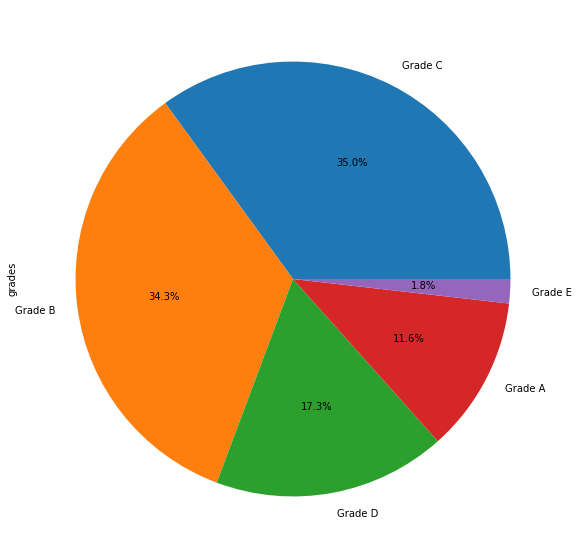

In [31]:
plt.figure(figsize=(10, 10),facecolor='w')
df['grades'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

### Observations:
Most of the students got Grade B and Grade C.

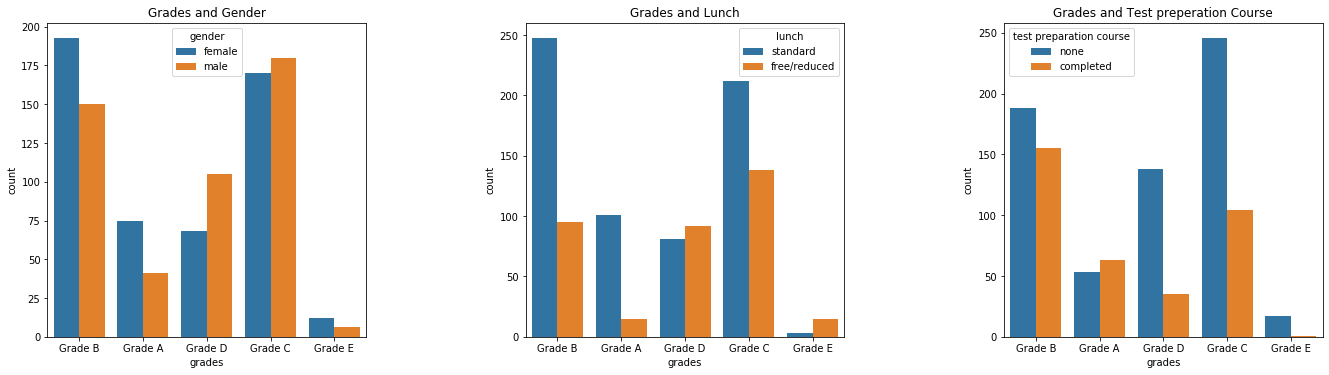

In [32]:
plt.figure(figsize=(40,12), facecolor='w')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(251)
plt.title('Grades and Gender')
sns.countplot(hue="gender", x="grades", data=df)

plt.subplot(252)
plt.title('Grades and Lunch')
sns.countplot(hue="lunch", x="grades", data=df)

plt.subplot(253)
plt.title('Grades and Test preperation Course')
sns.countplot(hue="test preparation course", x="grades", data=df)

plt.show()

### Observations:
* Most of the females scored either Grade B or C
* Most of the students who took Standard Lunch recieved Grade B or C, but its not too notable since most students recieved the same grades
* There are more number of Students who didn't take any Test Preparation Courses and as a result most of them are focused only in Grade B or C

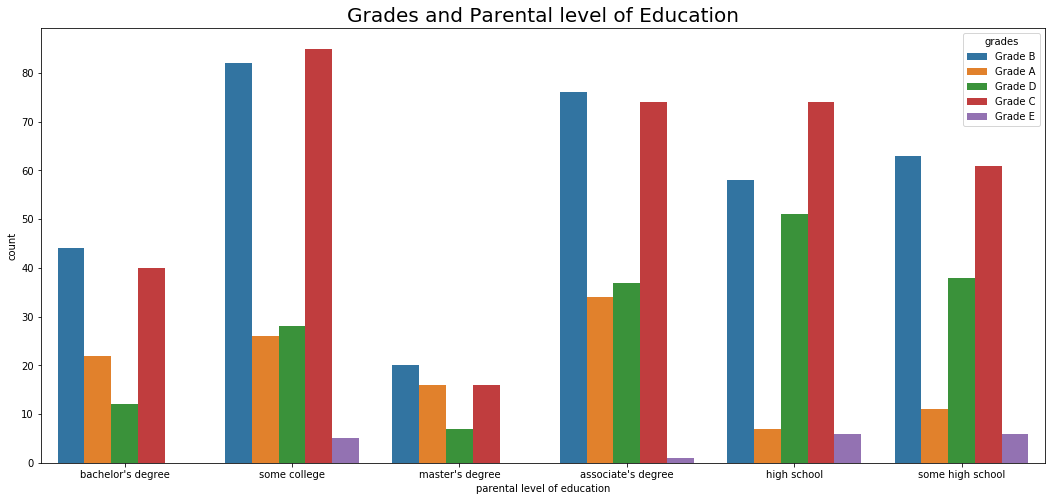

In [33]:
plt.figure(figsize=(18,8), facecolor='w')
plt.title('Grades and Parental level of Education',fontsize=20)
sns.countplot(x="parental level of education", hue="grades", data=df)
plt.show()

### Observations:
* Parents with qualifications from some college or high school or with an associate's degree accounts for most of the Students.
* Its also seen that these same students score the average Grade B or C.
* There are very few Students with their Parents with a Master's degree but their grades are better than the rest.

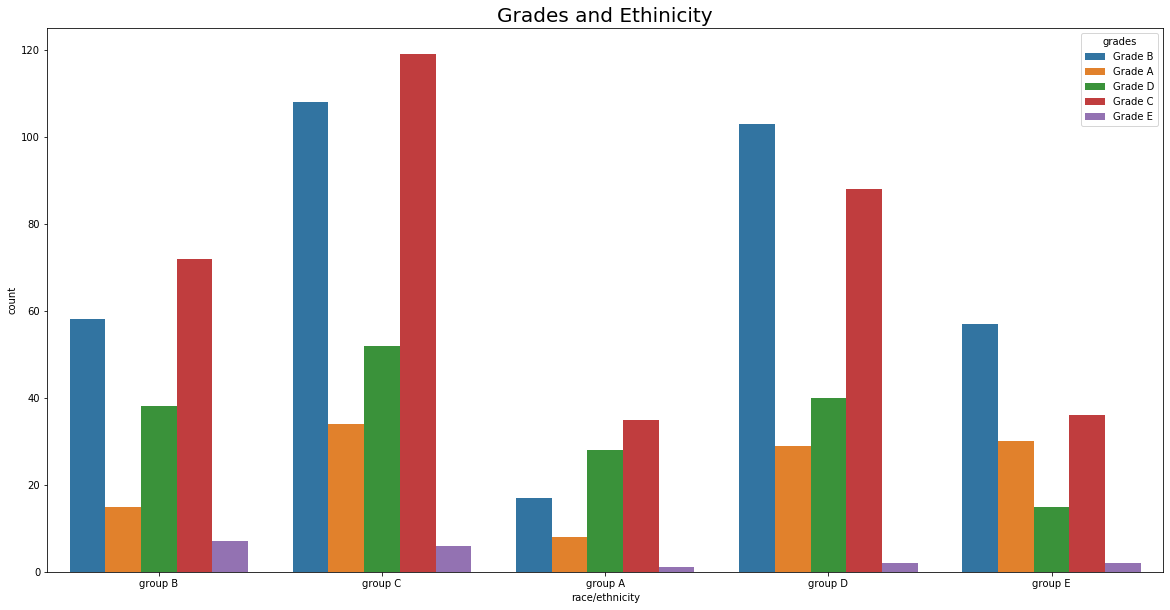

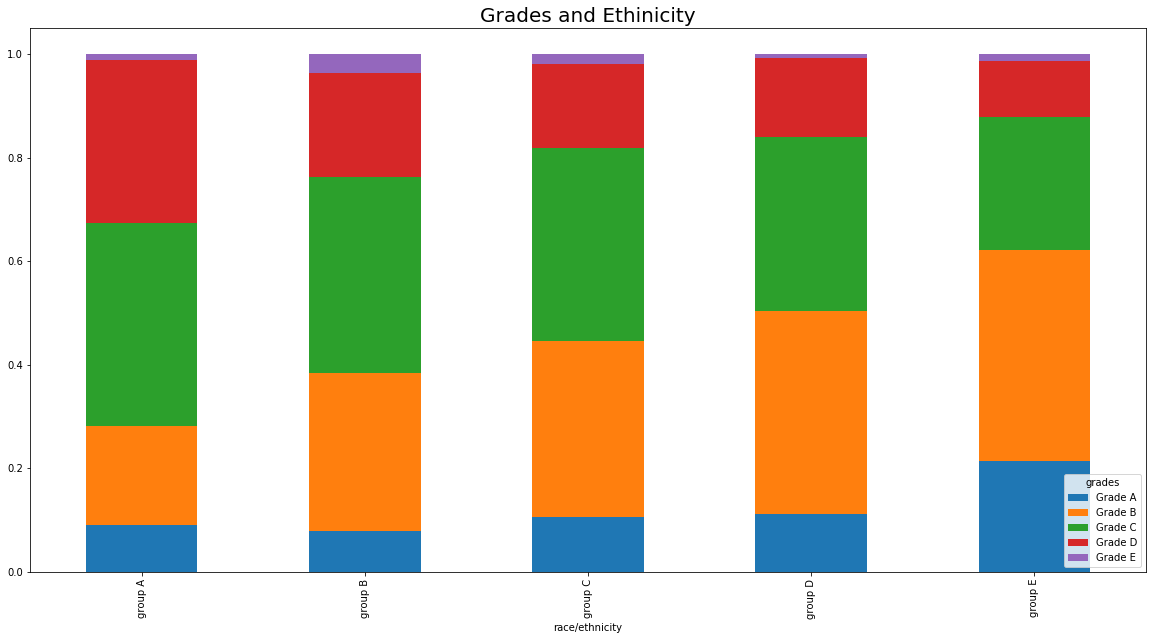

In [34]:
plt.figure(figsize=(20, 10), facecolor='w')
plt.title('Grades and Ethinicity',fontsize=20)
sns.countplot(x="race/ethnicity", hue="grades", data=df)

gr=pd.crosstab(df['race/ethnicity'],df['grades'],normalize=0) #normalized values 
gr.plot.bar(stacked=True, figsize=(20, 10))
plt.title('Grades and Ethinicity',fontsize=20)
plt.show()

### Observations:
* Very few candidates belong to Group A
* Each Group has Students who secured grade E but very few numbers too
* Race/Ethnicity doesn't have much notable effect on the Total Score.